# Вариант 10


In [65]:
import numpy as np
import math
import pandas as pd
import itertools
%matplotlib inline
import matplotlib.pyplot as plt

# № 1.1.10

**Найти сумму ряда аналитически. Вычислить значения частичных сумм ряда и найти величину погрешности при значениях N.**

Исходный ряд: $$ \sum_{n=0}^{\infty}\frac{84}{13(n^{2}+14n+48)} $$

Найдем аналитически сумму ряда:

$$ \sum_{n=0}^{N}\frac{84}{13(n^{2}+14n+48)} = \frac{84}{13} \sum_{n=0}^{N}\frac{1}{(n+7)^{2}-1} = \frac{84}{13} \sum_{n=0}^{N}\frac{1}{(n+6)(n+8)}= \frac{84}{13} \sum_{n=0}^{N} \frac{1}{2} (\frac{1}{n+6}-\frac{1}{n+8})= \frac{42}{13} (\frac{1}{6}+\frac{1}{7}-\frac{1}{N+7}-\frac{1}{N+8}) $$

$$ S = \lim_{N\rightarrow \infty  } S_{N}= \lim_{N\rightarrow \infty  }( \frac{42}{13} (\frac{1}{6}+\frac{1}{7}-\frac{1}{N+7}-\frac{1}{N+8}))= \frac{42}{13}\cdot \frac{13}{42}=1$$


In [12]:
s = lambda n: (84/(13*(n**2+14*n+48))) #данный ряд
correct = 1 #аналитически вычисленная сумма ряда 

In [13]:
def sum_series(series, N, correct): #функция нахождения суммы ряда, абсолютной ошибки при разных N 
    
    sums = [] #частичная сумма ряда при разных N
    errors = [] #абсолютная ошибка 
    true_digits = [] #количество верных цифр
    
    for i in N:
        sum_N =  np.sum([series(n) for n in range(i)])
        sums.append(sum_N)
        
        error_N = abs(correct - sum_N)
        errors.append(error_N)
        
        true_digits.append(digit(error_N))
        
    return sums, errors, true_digits
    
        
def digit(error): #функция нахождения количества верных цифр 
    
    true_dig = 0
    degree = 1.0
    while (degree > -10):
        if (error < np.power(10, degree)):
            true_dig += 1
            degree -= 1
        else:
             return true_dig          
    return None

In [14]:
N = [10, 10**2, 10**3, 10**4, 10**5]

part_sums, abs_erorrs, true_digits = sum_series(s, N, correct)

df = pd.DataFrame()
df["Количество членов ряда: N"] = N
df["Частичная сумма ряда"] = part_sums
df["Абсолютная ошибка"] = abs_erorrs
df["Количество верных цифр"] = true_digits
df

,Количество членов ряда: N,Частичная сумма ряда,Абсолютная ошибка,Количество верных цифр
0,10,0.608032,0.391968,2
1,100,0.939327,0.060673,3
2,1000,0.993580,0.006420,4
3,10000,0.999354,0.000646,5
4,100000,0.999935,0.000065,6


**Вывод:** Как видно из приведенного вычислительного эксперимента, увеличение числа членов ряда в 10 раз по сравнению с предыдущим случаем увеличивает число верных цифр в ответе на 1

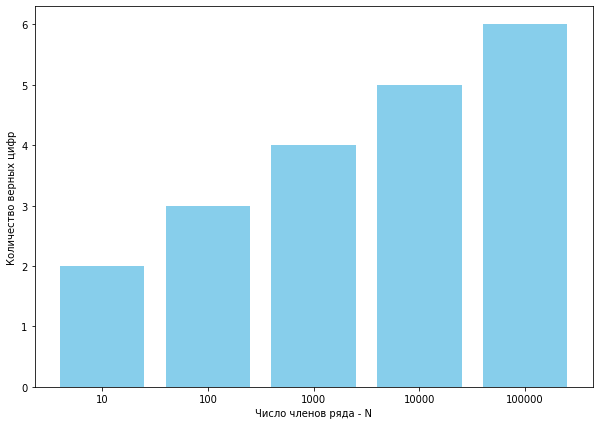

In [15]:
plt.figure(figsize=(10, 7))
plt.bar(["10", "100", "1000", "10000", "100000"],df['Количество верных цифр'], color = 'skyblue')
plt.xlabel('Число членов ряда - N')
plt.ylabel('Количество верных цифр')
plt.show()

# № 1.8

**Составить программу, моделирующую вычисления на ЭВМ с ограниченной разрядностью m.**

**Решить задачу 1.1 для случая N =10000 , используя эту программу.**

**Составить график зависимости погрешности от количества разрядов m=4,5,...,8.**

In [16]:
def digit_sum(n, m):
    cur_sum = 0
    for i in range(0,n+1):
        cur_elem = s(i)
        mantissa, exp = math.frexp(cur_elem)
        digits = str(mantissa)[:m+2]
        cur_elem = float(digits)*2**exp
        cur_sum += cur_elem
    return cur_sum

def abs_error(sum1, sum2): #фунция вычисления абсолютной ошибки 
    return abs(sum1 - sum2)

def relative_error(sum1, sum2): #функция вычисления относительной ошибки
    return abs((sum2 - sum1) / sum1)

In [17]:
N = 10000
sum1 =  np.sum([s(n) for n in range(N)])

m = [4,5,6,7,8]
abs_err = []
rel_err = []
values = []
df2 = pd.DataFrame()

for i in m:
    cur_sum = digit_sum(N, i)
    cur_rel_err = relative_error(sum1, cur_sum)
    cur_abs_err = abs_error(sum1, cur_sum)
    
    abs_err.append(cur_abs_err)
    rel_err.append(cur_rel_err)
    values.append(cur_sum)
    
df2["Количество разрядов: m"] = m
df2["Частичная сумма с m разрядами"] = values
df2["Абсолютная ошибка"] = abs_err
df2["Относительная ошибка"] = rel_err

df2

,Количество разрядов: m,Частичная сумма с m разрядами,Абсолютная ошибка,Относительная ошибка
0,4,0.999276,7.858000e-05,7.863077e-05
1,5,0.999347,7.457849e-06,7.462668e-06
2,6,0.999353,8.304545e-07,8.309911e-07
3,7,0.999354,4.980728e-09,4.983946e-09
4,8,0.999354,5.682553e-08,5.686224e-08


Text(0, 0.5, 'Абсолютная ошибка')

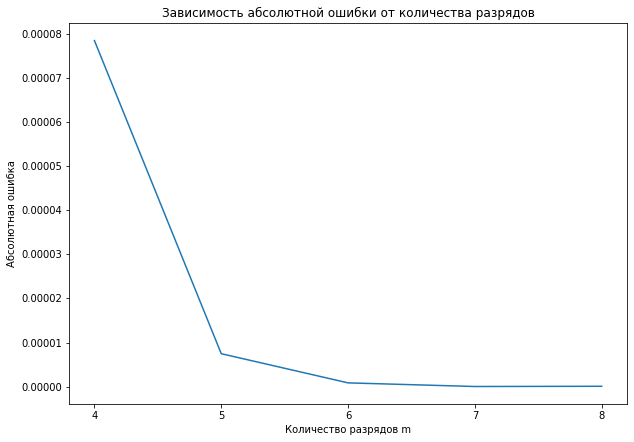

In [28]:
plt.figure(figsize=(10, 7))
plt.title("Зависимость абсолютной ошибки от количества разрядов")
plt.plot(m, abs_err)
plt.xticks(m)
plt.xlabel("Количество разрядов m")
plt.ylabel("Абсолютная ошибка")

Text(0, 0.5, 'Относительная ошибка')

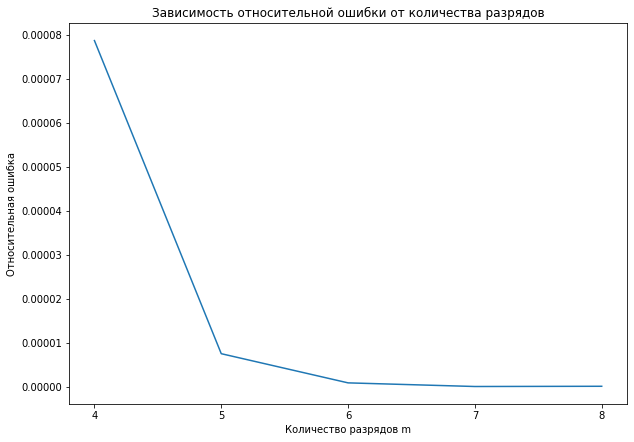

In [29]:
plt.figure(figsize=(10, 7))
plt.title("Зависимость относительной ошибки от количества разрядов")
plt.plot(m, rel_err)
plt.xticks(m)
plt.xlabel("Количество разрядов m")
plt.ylabel("Относительная ошибка")

# № 1.3.3.

**Для заданной матрицы A найти обратную матрицу (если это возможно). Затем в элемент a11 внести
погрешность в 10% и снова найти обратную матрицу. Объяснить полученные результаты.**


In [101]:
A = np.array([[3, 5, 3], 
              [9, 15, 9], 
              [6, 7, 2]])
round(np.linalg.det(A),5)

0.0

Две строки линейно - зависимые, поэтому определитель матрицы равен нулю. Следовательно, матрица вырожденная, поэтому не имеет обратной.

In [32]:
A1 = np.matrix('3.3 5 3; 9 15 9; 6 7 2')  #измененная матрица 
round(np.linalg.det(A1),3)

-9.9

In [34]:
A1_inv = np.linalg.inv(A1) #обратная матрица к измененной 
A1_inv

matrix([[ 3.33333333e+00, -1.11111111e+00,  1.17190208e-16],
        [-3.63636364e+00,  1.15151515e+00,  2.72727273e-01],
        [ 2.72727273e+00, -6.96969697e-01, -4.54545455e-01]])

**Вывод:** До внесения возмущений в матрицу она имела определитель, равный нулю. Внесение абсолютной погрешности привело к изменению первого сомножителя в выражении, вычисляемом по правилу Сарруса. Определитель принял значение, отличное от нуля и вычисление обратной матрицы стало возможным.

# №1.6

**Для пакета MATHCAD найти значения машинного нуля, машинной бесконечности, машинного эпсилон.**

См. файл Task1.6.


<img src="task1.6.png">

# №1.7

**Вычислить значения машинного нуля, машинной бесконечности, машинного эпсилон в режимах одинарной и двойной точности на алгоритмическом языке. Сравнить результаты с результатами задачи 1.6.**

In [45]:
def get_zero(precision):
    n = 0
    while(precision(2**(-n)) != 0.0):
        n += 1
    return 2**(-n + 1)


def get_infty(precision):
    n = 0
    inf = 0
    while inf != np.inf:
        try:
            inf = precision(2.0 ** n)
        except OverflowError:
            return 2.0**(n-1)
        n += 1
    return 2.0**(n-1)

def get_epsilon(precision):
    n = 0
    while(precision(2**(-n) + 1) != 1.0):
        n += 1
    return 2**(-n + 1)


In [46]:
print("Одинарная точность:")
print("Машинный ноль: {}".format(get_zero(np.float32)))
print("Машинная бесконечность: {}".format(get_infty(np.float32)))
print("Машинный эпсилон: {}".format(get_epsilon(np.float32)))

Одинарная точность:
Машинный ноль: 1.401298464324817e-45
Машинная бесконечность: 3.402823669209385e+38
Машинный эпсилон: 1.1920928955078125e-07


In [47]:
print("Двойная точность:")
print("Машинный ноль: {}".format(get_zero(np.float64)))
print("Машинная бесконечность: {}".format(get_infty(np.float64)))
print("Машинный эпсилон: {}".format(get_epsilon(np.float64)))

Двойная точность:
Машинный ноль: 5e-324
Машинная бесконечность: 8.98846567431158e+307
Машинный эпсилон: 2.220446049250313e-16


**Вывод:** В ходе решения задач 1.6 и 1.7  были получены результаты, порядки которых сопоставимы с порядками теоретически определенных величин для современных ЭВМ, что подтверждает корректную постановку эксперимента.

# №1.9.4

**Для матрицы A решить вопрос о существовании обратной матрицы в следующих случаях:**

**1) элементы матрицы заданы точно;**

**2) элементы матрицы заданы приближенно с относительной погрешностью:**
       
       a) δ =α% 
       b) δ = β%.
**Найти относительную погрешность результата.**

In [102]:
# элементы матрицы заданы точно 
A = np.array([[9, 5, 6], 
              [13.5, 9.5, 11], 
              [8, 4, 5]])
det_correct = np.linalg.det(A)
print('Определитель матрицы:', det_correct)
A_inv = np.linalg.inv(A)
print("Обратная матрица к A:")
A_inv

Определитель матрицы: 2.000000000000001
Обратная матрица к A:


array([[  1.75,  -0.5 ,  -1.  ],
       [ 10.25,  -1.5 ,  -9.  ],
       [-11.  ,   2.  ,   9.  ]])

Определитель матрицы не равен нулю, следовательно, она невырожденная и имеет обратную матрицу. 

In [75]:
# элементы матрицы заданы приближенно с относительной погрешностью
alpha = 0.1
betta = 0.5

In [77]:
def get_det(A, sigma): #Вычисление 2^9 определителей матриц
    determinants = []
    dimension = A.shape[0]*A.shape[1]
    bool_matrix = itertools.product([0,1], repeat=dimension)
    for cur_vec in bool_matrix:
        cur_A = A.flatten()
        for i in range(dimension):
            if cur_vec[i] == 0:
                cur_A[i] = cur_A[i] * (1 - sigma)
            else:
                cur_A[i] = cur_A[i] * (1 + sigma)
                
        cur_A = cur_A.reshape((A.shape[0], A.shape[1]))
        
        determinants.append(np.linalg.det(cur_A))
        
    return determinants

In [95]:
def is_inv(determinant): #матрица обратима, когда определитель не равен нулю
    if determinant == 0:
        print("Матрица не имеет обратной")
        
def check_inv(min_det, max_det): #если 0 принадлежит отрезку, то неопределенность, иначе обратима 
    if min_det*max_det < 0:
        print("Неопределенность")
    else:
        print("Обратима, нет нуля в отрезке [m, M]")

In [129]:
dets_alpha = get_det(A, alpha)
min_det, max_det = np.min(dets_alpha), np.max(dets_alpha)
print('Отрезок [m,M] = ', '[',min_det,',',max_det,']')

is_inv(min_det)
is_inv(max_det)
check_inv(min_det, max_det)

Отрезок [m,M] =  [ -82.50600000000001 , 95.47299999999998 ]
Неопределенность


Общую относительную погрешность будем вычислять, как среднее арифметическое всех относительных погрешностей. На каждом измерении относительную погрешность будет вычислять как отношение абсолютной погрешности к нормированному значению. В качестве нормированного значения возьмем максимальное.

In [130]:
rel= []
for i in dets_alpha:
    rel.append(abs((det_correct-i)/max_det))
print('Общая относительная погрешность = ', sum(rel)/len(dets_alpha))

Общая относительная погрешность =  0.2151451277455409


In [131]:
dets_betta = get_det(A, betta)
min_det, max_det = np.min(dets_betta), np.max(dets_betta)
print('Отрезок [m,M] = ', '[',min_det,',',max_det,']')

is_inv(min_det)
is_inv(max_det)
check_inv(min_det, max_det)

Отрезок [m,M] =  [ -1577.2499999999993 , 1630.1249999999989 ]
Неопределенность


In [132]:
rel = []
for i in dets_betta:
    rel.append(abs((det_correct-i)/max_det))
print('Общая относительная погрешность = ', sum(rel)/len(dets_betta))

Общая относительная погрешность =  0.19224225519515395
